<a href="https://colab.research.google.com/github/xqunt/Site_Codigos_Analise/blob/master/Predi%C3%A7%C3%A3o_Site.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-datareader
!pip install --upgrade pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 5.2 MB/s eta 0:00:00
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas_datareader as pdr
import datetime
import pandas as pd
#import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np
import datetime
import pandas_datareader.data as web
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import display, HTML
!pip install plotly==4.14.3
!pip install "notebook>=5.3" "ipywidgets>=7.5"
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Início e fim
#start = datetime.date(2015,1,1).isoformat()
#end = datetime.date(2022,8,27).isoformat()
start = "2021-09-08"
end = "2023-02-07"

In [ ]:
# Recupera dados
ativo = web.get_data_yahoo('VALE3.SA',start,end) 
ibov = web.get_data_yahoo('^BVSP',start,end) #Ibovespa


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
ativo

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-08 00:00:00-03:00,96.47,96.73,94.70,95.04,78.56,22635100
2021-09-09 00:00:00-03:00,95.16,95.72,93.17,94.70,78.28,28997700
2021-09-10 00:00:00-03:00,95.51,96.19,94.81,94.81,78.37,18022000
2021-09-13 00:00:00-03:00,94.70,95.00,93.94,94.76,78.32,18832800
2021-09-14 00:00:00-03:00,95.15,95.58,93.07,94.09,77.77,25571600
...,...,...,...,...,...,...
2023-01-31 00:00:00-03:00,94.31,94.88,93.85,94.51,94.51,20658600
2023-02-01 00:00:00-03:00,95.20,95.20,91.59,93.46,93.46,28818100
2023-02-02 00:00:00-03:00,91.69,91.96,88.86,89.14,89.14,37844400


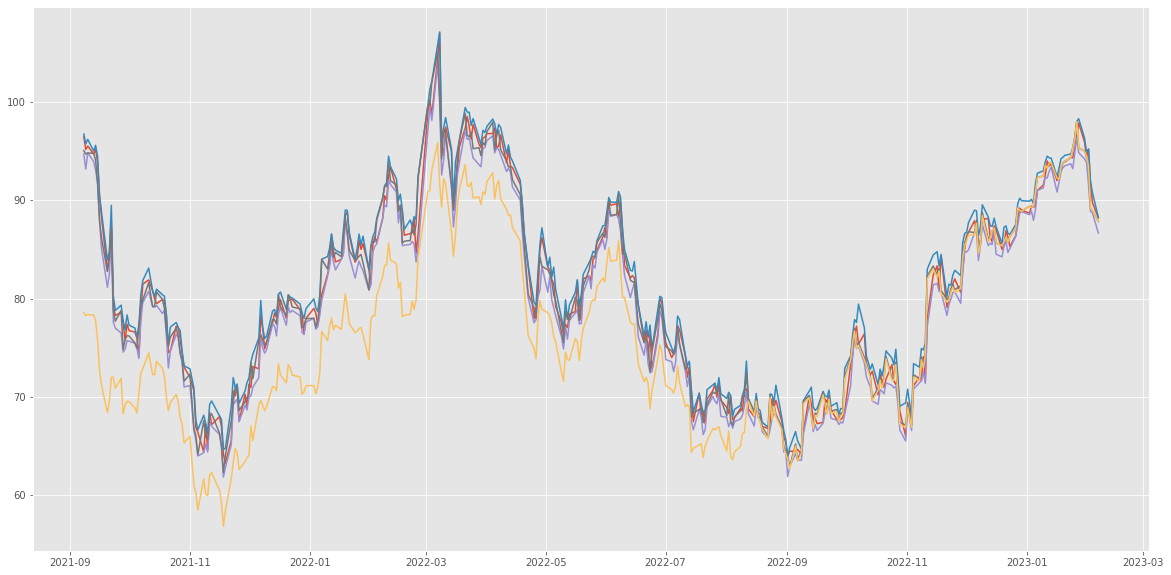

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(ativo.loc[:,[col for col in ativo.columns if col != "Volume"]])

## Regressão Linear

Imagine a relação entre horas de estudos e resultado acadêmico.  
Quanto mais horas de estudo, melhor o resultado. Pode-se tentar estabelecer uma relação linear entre ambas variáveis.

In [ ]:
# Criação da coluna Var
ativo['var'] = ativo['Adj Close'].pct_change()
ativo = ativo.dropna()
ibov['var'] = ibov['Adj Close'].pct_change()
ibov = ibov.dropna()

In [ ]:
Y = ativo['var']
X = ibov['var']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const   0.00
var     0.87
dtype: float64

In [ ]:
ibov['var'].size

353

In [ ]:
ativo['var'].size

353

In [ ]:
ativo['var'].index.difference(ibov['var'].index)

DatetimeIndex([], dtype='datetime64[ns, America/Sao_Paulo]', name='Date', freq=None)

In [ ]:
# Eliminando as linhas estranhas
df = pd.concat(
    {'ibov':ibov['var'], 'ativo':ativo['var']},
    join='inner', # INNER VAI DESCARTAR OS DIAS EM QUE TEMOS UMA VARIÁVEL E NÃO A OUTRA
    axis=1
)

In [ ]:
df

,ibov,ativo
Date,,
2021-09-09 00:00:00-03:00,0.02,-0.00
2021-09-10 00:00:00-03:00,-0.01,0.00
2021-09-13 00:00:00-03:00,0.02,-0.00
2021-09-14 00:00:00-03:00,-0.00,-0.01
2021-09-15 00:00:00-03:00,-0.01,-0.02
...,...,...
2023-01-31 00:00:00-03:00,0.01,-0.00
2023-02-01 00:00:00-03:00,-0.01,-0.01
2023-02-02 00:00:00-03:00,-0.02,-0.05


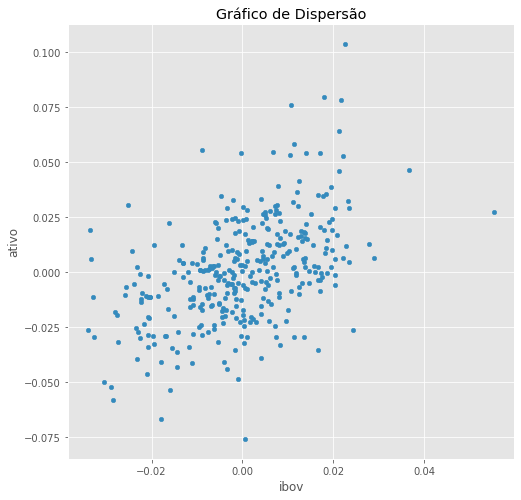

In [ ]:
df.plot.scatter('ibov','ativo', title = 'Gráfico de Dispersão' , figsize=(8,8))

In [ ]:
# Efetuando a regressão para o período)

Y = df.ativo
X = df.ibov
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const   0.00
ibov    0.87
dtype: float64

In [ ]:


plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

olsmod = sm.OLS(Y, X)
olsres = olsmod.fit()
print(olsres.summary())



                            OLS Regression Results                            
Dep. Variable:                  ativo   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     112.9
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           4.77e-23
Time:                        16:01:35   Log-Likelihood:                 866.65
No. Observations:                 353   AIC:                            -1729.
Df Residuals:                     351   BIC:                            -1722.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      0.568      0.5

Propriedades do coeficiente de correlação linear
 −1 ≤ r ≤ 1
 Se r ≈ 1 ⇒ correlação forte positiva.
 Se r ≈ −1 ⇒ correlação forte negativa.
 Se r ≈ 0 ⇒ não existe correlação linear.

https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/

Na regressão existem dois tipos de variáveis, ou seja, variável dependente (também chamada de variável explicada) e variável independente (variável explicativa). 

A linha de regressão usada aqui é,

\hat{Y}_{i}=-3,2002+0,7529 X_{i}

A tabela de resumo da regressão é fornecida abaixo.

                                    Resultados de regressão OLS                            
        ================================================== ============================
        Departamento Variável: y R-quadrado: 0,669
        Modelo: OLS Adj. R ao quadrado: 0,667
        Método: Estatística F dos Mínimos Quadrados: 299,2
        Data: Seg, 01 de março de 2021 Prob (estatística F): 2.33e-37
        Hora: 16:19:34 Log-Probabilidade: -88.686
        Nº Observações: 150 AIC: 181,4
        Df Residuais: 148 BIC: 187,4
        Modelo Df: 1                                         
        Tipo de covariância: não robusto                                         
        ================================================== ============================
                         coef std err t P>|t| [0,025 0,975]
        -------------------------------------------------- ----------------------------
        const -3,2002 0,257 -12,458 0,000 -3,708 -2,693
        x1 0,7529 0,044 17,296 0,000 0,667 0,839
        ================================================== ============================
        Omnibus: 3.538 Durbin-Watson: 1.279
        Prob(Omnibus): 0,171 Jarque-Bera (JB): 3,589
        Inclinação: 0,357 Prob(JB): 0,166
        Curtose: 2.744 Cond. Nº 43.4
        ================================================== ============================
Variável dependente: Variável dependente é aquela que vai depender de outras variáveis. Nesta análise de regressão Y é nossa variável dependente porque queremos analisar o efeito de X em Y.

Modelo: O método dos Mínimos Quadrados Ordinários (OLS) é o modelo mais utilizado devido à sua eficiência. Este modelo fornece a melhor aproximação da linha de regressão populacional verdadeira. O princípio do OLS é minimizar o quadrado dos erros ( ∑e i 2 ).

Número de observações: O número de observações é o tamanho da nossa amostra, ou seja, N = 150.

Grau de liberdade (df) dos resíduos: 
Grau de liberdade é o número de observações independentes com base nas quais a soma dos quadrados é calculada.

Resíduos Df = 150 – (1+1) = 148

Grau de liberdade (Df) é calculado como,      

 Graus de liberdade,   D. f = N – K

Onde, N = tamanho da amostra (nº de observações) e   K = número de variáveis ​​+ 1

Df do modelo: 
Df do modelo = K – 1 = 2 – 1 = 1 ,

Onde, K = número de variáveis ​​+ 1



                   

Termo constante: Os termos constantes são a interseção da linha de regressão. Da linha de regressão (eq…1) o intercepto é -3,002. Na regressão omitimos algumas variáveis ​​independentes que não têm muito impacto na variável dependente, o intercepto informa o valor médio dessas variáveis ​​omitidas e ruídos presentes no modelo.

Termo do coeficiente: O termo do coeficiente informa a mudança em Y para uma mudança de unidade em X   , ou seja, se X aumenta em 1 unidade, então Y aumenta em 0,7529. Se você estiver familiarizado com as derivadas, poderá relacioná-las como a taxa de variação de Y em relação a X.

Erro padrão dos parâmetros: O erro padrão também é chamado de desvio padrão. O erro padrão mostra a variabilidade amostral desses parâmetros. O erro padrão é calculado por – 
 

Erro padrão do termo de interceptação (b1): 

se\left(b_{1}\right)=\sqrt{\left(\frac{\sum x_{i}^{2}}{n \sum\left(x_{i}-\bar{x}\ direito)^{2}}\direito) \sigma^{2}}

Erro padrão do termo do coeficiente (b2): 

se\left(b_{2}\right)=\sqrt{\frac{\sigma^{2}}{\sum\left(x_{i}-\bar{x}\right)}}

Aqui, σ 2 é o erro padrão de regressão (SER) . E σ 2 é igual a RSS( Residual Sum Of Square ie ∑e i 2 ).

  

t – estatísticas: 
Em teoria, assumimos que o termo de erro segue a distribuição normal e por isso os parâmetros b 1   e  b 2 também possuem distribuições normais com variância calculada na seção acima.

 Aquilo é , 

b 1  ∼ N(B 1 , σ b1 2 )
b 2    ∼ N(B 2 , σ b2 2 )
Aqui B 1 e B 2  são meios verdadeiros de b1 e b2.

t – as estatísticas são calculadas assumindo a seguinte hipótese – 

H 0  : B 2  = 0 (variável X não tem influência em Y)
H a  : B 2  ≠ 0 (X tem impacto significativo em Y)
Cálculos para t - estatísticas:          

                     t = (b 1 – B 1 ) / se (b 1 )

 Da tabela de resumo , b 1 = -3,2002 e se(b 1 ) = 0,257, Então,

                   t = (-3,2002 – 0) / 0,257 = -12,458

Da mesma forma, b 2 = 0,7529 , se(b 2 ) = 0,044

                   t = (0,7529 – 0) / 0,044 = 17,296

p – valores: 
Em teoria, lemos que o valor p é a probabilidade de obter a estatística t pelo menos tão contraditória a H 0  calculada a partir da suposição de que a hipótese nula é verdadeira. Na tabela de resumo, podemos ver que o valor P para ambos os parâmetros é igual a 0. Isso não é exatamente 0, mas como temos estatísticas muito maiores (-12,458 e 17,296), o valor p será aproximadamente 0.

Se você conhece os níveis de significância, pode ver que podemos rejeitar a hipótese nula em quase todos os níveis de significância.

Intervalos de confiança:
Existem muitas abordagens para testar a hipótese, incluindo a abordagem do valor-p mencionada acima. A abordagem do intervalo de confiança é uma delas. 5% é o nível de significância padrão (∝) no qual os C.Is são feitos. 

CI para B 1 é ( b 1 – t ∝/2 se(b 1 ), b 1 + t ∝/2 se(b 1 ) )

Como ∝ = 5%, b 1 = -3,2002, se(b 1 ) = 0,257 , da tabela t , t 0,025,148 = 1,655,

Depois de colocar os valores, o CI para B 1 é de aprox. (-3,708, -2,693). O mesmo pode ser feito para b 2 também.

Ao calcular os valores de p, rejeitamos a hipótese nula, podemos ver o mesmo em CI também. Como 0 não está em nenhum dos intervalos, rejeitaremos a hipótese nula. 



 R – valor ao quadrado: 
R 2 é o coeficiente de determinação que nos diz quanto de variação percentual da variável independente pode ser explicada pela variável independente. Aqui, a variação de 66,9% em Y pode ser explicada por X. O valor máximo possível de R 2   pode ser 1, significa que quanto maior o valor de R 2  melhor a regressão.

F – estatística: 
O teste F informa a qualidade do ajuste de uma regressão. O teste é semelhante ao teste t ou outros testes que fazemos para a hipótese. A estatística F - é calculada como abaixo -                    

F=\frac{R^{2} /(k-1)}{\left(1-R^{2}\right) /(nk)}

Inserindo os valores de R 2 , nek, F = (0,669/1) / (0,331/148) = 229,12.

Você pode calcular a probabilidade de F > 229,1 para 1 e 148 df, que chega a aprox. 0. A partir disso, rejeitamos novamente a hipótese nula declarada acima. 

Os demais termos não são usados ​​com frequência. Termos como Skewness e Kurtosis falam sobre a distribuição de dados. A assimetria e a curtose para a distribuição normal são 0 e 3, respectivamente. O teste Jarque-Bera é usado para verificar se um erro tem distribuição normal ou não.  

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ativo   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     112.9
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           4.77e-23
Time:                        16:01:35   Log-Likelihood:                 866.65
No. Observations:                 353   AIC:                            -1729.
Df Residuals:                     351   BIC:                            -1722.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      0.568      0.570      -0.002       0.003
ibov           0.8704      0.082     10.625      0.000       0.709       1.032
==============================================================================
Omnibus:                       18.244   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.149
Skew:                           0.317   Prob(JB):                     1.04e-07
Kurtosis:                       4.336   Cond. No.                         73.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Regressão em janela móvel
# Para isso, usaremos a fórmula de beta (covariancia sobre variancia)

def calc_beta(df):
    np_array = df.values
    m = np_array[:,0]
    s = np_array[:,1]

    covariance = np.cov(s,m)
    beta = covariance[0,1]/covariance[1,1]
    return beta


# Cálculo para período total bate com o da regressão do statsmodels
calc_beta(df)

0.8704319483265084

In [ ]:
# Janela que percorre o dataframe

def rolling_apply(df, period, func, min_periods=None):
    if min_periods is None:
        min_periods = period
    result = pd.Series(np.nan, index=df.index)

    for i in range(1, len(df)+1):
        sub_df = df.iloc[max(i-period, 0):i,:] 
        if len(sub_df) >= min_periods:
            idx = sub_df.index[-1]
            result[idx] = func(sub_df)
    return result




df['beta'] = np.nan
period = 252
beta = rolling_apply(df[['ibov','ativo']], period, calc_beta, min_periods = period)  
beta.name = 'beta'
df.update(beta)

In [ ]:
dataset = ativo
dataset

,Open,High,Low,Close,Adj Close,Volume,var
Date,,,,,,,
2021-09-09 00:00:00-03:00,95.16,95.72,93.17,94.70,78.28,28997700,-0.00
2021-09-10 00:00:00-03:00,95.51,96.19,94.81,94.81,78.37,18022000,0.00
2021-09-13 00:00:00-03:00,94.70,95.00,93.94,94.76,78.32,18832800,-0.00
2021-09-14 00:00:00-03:00,95.15,95.58,93.07,94.09,77.77,25571600,-0.01
2021-09-15 00:00:00-03:00,93.88,94.44,91.74,91.74,75.83,35084400,-0.02
...,...,...,...,...,...,...,...
2023-01-31 00:00:00-03:00,94.31,94.88,93.85,94.51,94.51,20658600,-0.00
2023-02-01 00:00:00-03:00,95.20,95.20,91.59,93.46,93.46,28818100,-0.01
2023-02-02 00:00:00-03:00,91.69,91.96,88.86,89.14,89.14,37844400,-0.05


In [ ]:
# Separa Valores lidos, e valor a ser previsto
atributos = ['Open', 'High', 'Low', 'Volume']
# Variável a ser prevista
atrib_prev = ['Adj Close']
# Criando objetos
x = dataset[atributos].values
y = dataset[atrib_prev].values

# Divide 75% dos dados aleatoriamente para treino e o restante para teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, random_state=42)

##Treinamento da máquina
# Modelo de regressão linear
modelo = LinearRegression()
# Treina o modelo
modelo.fit(X_treino, y_treino)


# Predizer 21 resultados

predicao = (modelo.predict(X_teste[:21]))




#print(modelo.predict(X_teste[:21]))

print(predicao)

mediapredicao = sum(predicao) / len(predicao)


#print("A média é =",sum(predicao) / len(predicao));

print("A média é =", mediapredicao);


# Validando o modelo
# usando mean_squared_error
RMSE = mean_squared_error(y_teste, modelo.predict(X_teste))**0.5
print("Média de erro {0}".format(RMSE))

pontoentrada = mediapredicao - (RMSE*1)

stop = (RMSE / mediapredicao)* 100

gainparcial = mediapredicao -  RMSE

#Media - Erro  =  Entrada
print("O ponto de entrada é comprar abaixo de: ", pontoentrada)
print("O percentual de stop é de (%) : ", stop)
print("O percentual de Gain é de (%) : ", 2 * stop)

print("O objetivo da operação é: ", gainparcial*1.5)

[[66.99638658]
 [63.50593075]
 [65.18423949]
 [72.81011181]
 [67.41911465]
 [80.8552941 ]
 [73.0901434 ]
 [69.09859336]
 [91.65705426]
 [86.63655325]
 [79.62902363]
 [81.72210129]
 [83.71295911]
 [68.83246462]
 [85.78135823]
 [79.25430723]
 [73.21829152]
 [89.13980769]
 [90.74916185]
 [70.23805147]
 [88.5757557 ]]
A média é = [77.52889067]
Média de erro 3.8680246205048165
O ponto de entrada é comprar abaixo de:  [73.66086605]
O percentual de stop é de (%) :  [4.98913964]
O percentual de Gain é de (%) :  [9.97827929]
O objetivo da operação é:  [110.49129907]


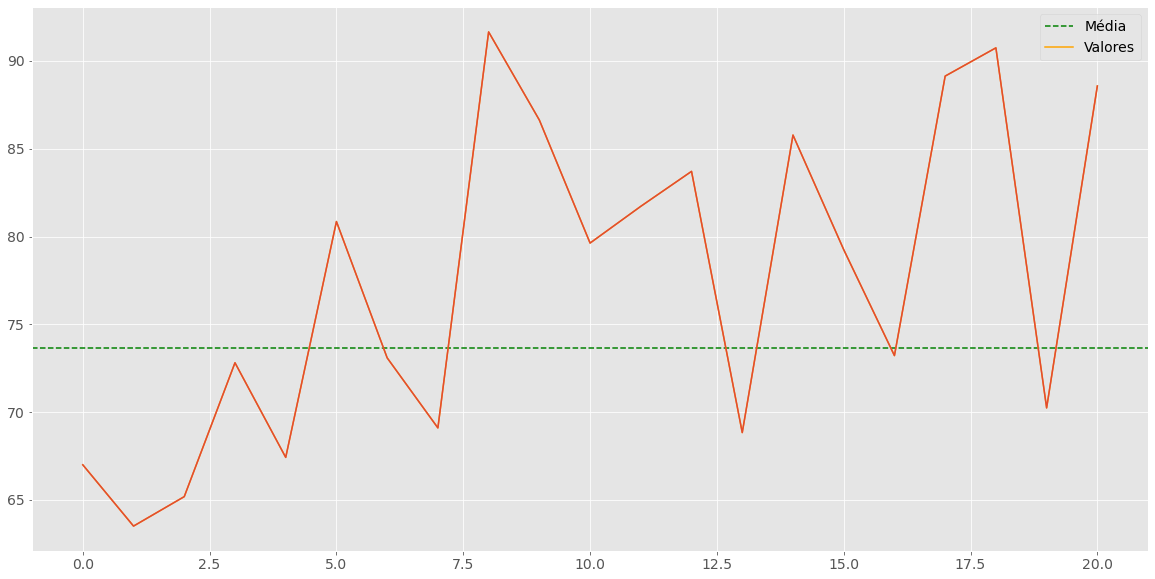

In [ ]:
#Grafico de 21 Pregões com as predições
#Testar entrada abaixo da mínima da média do período Linha Verde




plt.figure(figsize=(20,10))

plt.axhline(y = pontoentrada, color = 'g', linestyle = '--', label = 'Média') 


plt.plot(predicao, color = 'orange',  label ='Valores')
# plt.plot(x, label ='Pregões')

plt.legend()


plt.plot(predicao)